In [1]:
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pylab as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000, 10), (10000, 28, 28), (10000, 10))

In [3]:
def train_mnist(optimizer):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=x_train[0].shape),
        keras.layers.Dense(250, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.categorical_crossentropy,
        metrics=['accuracy']
    )

    history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=False,
                    shuffle=True,
                    validation_data=(x_test, y_test))

    return history, model

In [5]:
mnist = {
  'sgd': {'loss': [], 'acc': [], 'val_loss': [], 'val_acc': [], 'history': []},
  'rmsprop': {'loss': [], 'acc': [], 'val_loss': [], 'val_acc': [], 'history': []},
  'adagrad': {'loss': [], 'acc': [], 'val_loss': [], 'val_acc': [], 'history': []},
  'adam': {'loss': [], 'acc': [], 'val_loss': [], 'val_acc': [], 'history': []}
}
for optimizer in ['sgd', 'rmsprop', 'adagrad', 'adam']:
    print('--- {} ---'.format(optimizer))
    for i in range(10):
        print('starting ', i)
        history, model = train_mnist(optimizer)
        train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=False)
        val_loss, val_accuracy = model.evaluate(x_test, y_test, verbose=False)
        mnist[optimizer]['loss'].append(train_loss)
        mnist[optimizer]['acc'].append(train_accuracy)
        mnist[optimizer]['val_loss'].append(val_loss)
        mnist[optimizer]['val_acc'].append(val_accuracy)
        mnist[optimizer]['history'].append(history)

--- sgd ---
starting  0
starting  1
starting  2
starting  3
starting  4
starting  5
starting  6
starting  7
starting  8
starting  9
--- rmsprop ---
starting  0
starting  1
starting  2
starting  3
starting  4
starting  5
starting  6
starting  7
starting  8
starting  9
--- adagrad ---
starting  0
starting  1
starting  2
starting  3
starting  4
starting  5
starting  6
starting  7
starting  8
starting  9
--- adam ---
starting  0
starting  1
starting  2
starting  3
starting  4
starting  5
starting  6
starting  7
starting  8
starting  9


sgd acc 0.8954866588115692
sgd val_acc 0.903630006313324
sgd loss 0.37979438304901125
sgd val_loss 0.3651638627052307
rmsprop acc 0.9942000031471252
rmsprop val_acc 0.9763200044631958
rmsprop loss 0.02379862405359745
rmsprop val_loss 0.08124720677733421
adagrad acc 0.8449549973011017
adagrad val_acc 0.8560900032520294
adagrad loss 0.7267632365226746
adagrad val_loss 0.7117884695529938
adam acc 0.9955099999904633
adam val_acc 0.9753600120544433
adam loss 0.021411472745239735
adam val_loss 0.08079194724559784


[]

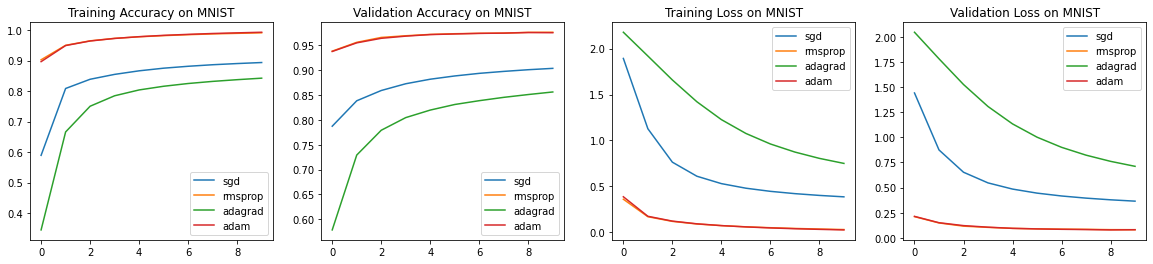

In [8]:
for opt in ['sgd', 'rmsprop', 'adagrad', 'adam']:
    for key in ['acc', 'val_acc', 'loss', 'val_loss']:
        print(opt, key, np.mean(mnist[opt][key]))

plt.figure(figsize=(20,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    key = ['accuracy', 'val_accuracy', 'loss', 'val_loss'][i]
    title = ['Training Accuracy on MNIST', 'Validation Accuracy on MNIST', 'Training Loss on MNIST', 'Validation Loss on MNIST'][i]
    for opt in ['sgd', 'rmsprop', 'adagrad', 'adam']:
        hist = np.zeros(10)
        for h in mnist[opt]['history']:
          hist = hist + np.array(h.history[key])
        mean = hist / 10
        plt.plot(mean, label=opt)
    plt.legend()
    plt.title(title)
plt.plot()